# **HackBio Bioinformatics Internship - Drug Discovery **

In this Jupyter notebook, we will be building a real-life **data science project**
Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

## **Section 1**
### **ChEMBL Database**

#### Install necessary libraries

In [1]:
!pip install chembl-webresource-client
!pip install rdkit-pypi
!pip install mordred

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.6 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176717 sha256=23fabdad248b87991e157dedd536ed660379da8e24c31920b24db9b73ff15aa4
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


### Import libraries

In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import rdkit
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors


### **Search for Target protein**

Please visit the chembl database to identify your target of interest,
Again, take note of the **target** of choice.
Your target must be from **homo sapiens**, **single protein** and **more 1000 compounds**

In [3]:
# Target search for your **choice**
my_target = new_client.target
my_target_query = my_target.search('egfr')
my_targets = pd.DataFrame.from_dict(my_target_query)
my_targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q01279', 'xref_name': None, 'xre...",Mus musculus,Epidermal growth factor receptor erbB1,16.0,False,CHEMBL3608,"[{'accession': 'Q01279', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Homo sapiens,EGFR/PPP1CA,16.0,False,CHEMBL4523747,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
2,[],Homo sapiens,VHL/EGFR,16.0,False,CHEMBL4523998,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,"[{'xref_id': 'P00533', 'xref_name': None, 'xre...",Homo sapiens,Epidermal growth factor receptor erbB1,12.0,False,CHEMBL203,"[{'accession': 'P00533', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Epidermal growth factor receptor,11.0,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
5,[],Homo sapiens,Protein cereblon/Epidermal growth factor receptor,11.0,False,CHEMBL4523680,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
6,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,10.0,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
7,[],Homo sapiens,MER intracellular domain/EGFR extracellular do...,10.0,False,CHEMBL3137284,"[{'accession': 'P00533', 'component_descriptio...",CHIMERIC PROTEIN,9606
8,[],Homo sapiens,ErbB-2/ErbB-3 heterodimer,10.0,False,CHEMBL4630723,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN COMPLEX,9606
9,"[{'xref_id': 'P04626', 'xref_name': None, 'xre...",Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9.0,False,CHEMBL1824,"[{'accession': 'P04626', 'component_descriptio...",SINGLE PROTEIN,9606


### **Select and retrieve bioactivity data for target**

We will assign the first entry (which corresponds to the target protein, *Plasmdium falciparum hexose transporter 1*) to the ***selected_target*** variable

In [4]:
selected_target = my_targets.target_chembl_id[3]
selected_target

'CHEMBL203'

Here, we will retrieve only bioactivity data for *Epidermal growth factor receptor erbB1* (CHEMBL203) that are reported as pChEMBL values.

In [5]:
activity = new_client.activity
data = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(data)

In [7]:
df.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04


## **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [8]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-8-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17281,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105762,[],CHEMBL5263207,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,202.5
17282,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105763,[],CHEMBL5263207,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,26.9
17283,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105764,[],CHEMBL5263207,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,228.9
17284,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25106404,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5263429,Inhibition of EGFR (unknown origin) using (Glu...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.67


In [9]:
len(df2.canonical_smiles.unique())

9794

In [10]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
3,None,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
6,None,None,32680,[],CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,9.3
7,None,None,32770,[],CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,500.0
8,None,None,32772,[],CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17238,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105719,[],CHEMBL5263205,Inhibition of EGFR L858R/T790M mutant (unknown...,B,P00533,"L858R,T790M",BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,4.1
17239,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105720,[],CHEMBL5263205,Inhibition of EGFR L858R/T790M mutant (unknown...,B,P00533,"L858R,T790M",BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,0.6
17240,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105721,[],CHEMBL5263205,Inhibition of EGFR L858R/T790M mutant (unknown...,B,P00533,"L858R,T790M",BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,27.7
17241,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105722,[],CHEMBL5263205,Inhibition of EGFR L858R/T790M mutant (unknown...,B,P00533,"L858R,T790M",BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,3.2


## **Data pre-processing of the bioactivity data**

#### **Combine the 3 columns (molecule_chembl_id, canonical_smiles, standard_value) and bioactivity_class into a DataFrame**

In [11]:
#print the entire column title
columns_list = df2_nr.columns.tolist()

print(columns_list)

['action_type', 'activity_comment', 'activity_id', 'activity_properties', 'assay_chembl_id', 'assay_description', 'assay_type', 'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint', 'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment', 'data_validity_description', 'document_chembl_id', 'document_journal', 'document_year', 'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value', 'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id', 'standard_flag', 'standard_relation', 'standard_text_value', 'standard_type', 'standard_units', 'standard_upper_value', 'standard_value', 'target_chembl_id', 'target_organism', 'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type', 'units', 'uo_units', 'upper_value', 'value']


In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0
6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0
7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0
8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0
...,...,...,...
17238,CHEMBL5270334,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4ccn(C)c4c3)n2...,4.1
17239,CHEMBL5271151,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,0.6
17240,CHEMBL5265870,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,27.7
17241,CHEMBL5269747,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,3.2


### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [13]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [14]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0
6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0
7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0
8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0


In [15]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0,active
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0,inactive
6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0,intermediate
7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0,inactive
8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0,active


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

In [16]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd
import numpy as np

In [17]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        # Check if elem is a valid SMILES string before converting
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [18]:
# Example usage (assuming df4 is your DataFrame)
df_lipinski = lipinski(df4.canonical_smiles)

In [19]:
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,482.903,3.61432,3.0,6.0
2,369.432,4.77200,1.0,6.0
3,283.287,2.31056,2.0,4.0
4,164.160,1.49000,2.0,2.0


In [20]:
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0,active
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0,inactive
6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0,intermediate
7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0,inactive
8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0,active


In [21]:
df_combined = pd.concat([df4,df_lipinski], axis=1)

In [22]:
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0,active,383.814,4.45034,3.0,4.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0,inactive,283.287,2.31056,2.0,4.0
6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0,intermediate,539.999,3.22822,3.0,7.0
7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0,inactive,249.222,1.40098,2.0,5.0
8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0,active,236.234,1.55914,2.0,5.0


In [23]:
df_combined.standard_value.describe()

,standard_value
count,9794
unique,2807
top,10000.0
freq,565


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [24]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        try: # this will try to convert i to a float
            i = float(i)
        except ValueError: # if i is not a number, set molar to 0
            molar = 0
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis = 1)

    return x
#Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [25]:
df_final = pIC50(df_combined)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,inactive,283.287,2.31056,2.0,4.0,6.769551
6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,539.999,3.22822,3.0,7.0,5.031517
7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,249.222,1.40098,2.0,5.0,3.301030
8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,active,236.234,1.55914,2.0,5.0,2.522879
...,...,...,...,...,...,...,...,...
9789,NaN,NaN,active,591.514,5.10290,3.0,9.0,NaN
9790,NaN,NaN,active,550.505,5.33730,3.0,7.0,NaN
9791,NaN,NaN,active,548.489,5.09130,3.0,7.0,NaN
9792,NaN,NaN,active,578.515,5.09990,3.0,8.0,NaN


In [26]:
df_final.pIC50.describe()

,pIC50
count,9794.000000
mean,6.495455
std,1.491483
min,1.259637
25%,5.247572
50%,6.531210
75%,7.540608
max,17.299989


## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [27]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

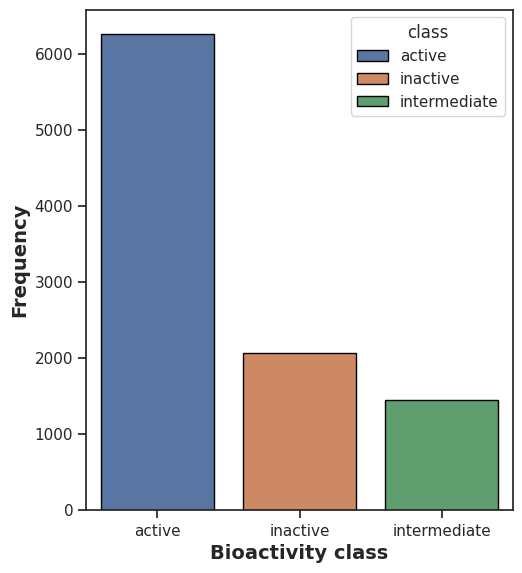

In [28]:
plt.figure(figsize=(5.5, 6.5))

sns.countplot(x='class', data=df_final, edgecolor='black', hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('pfht1_plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

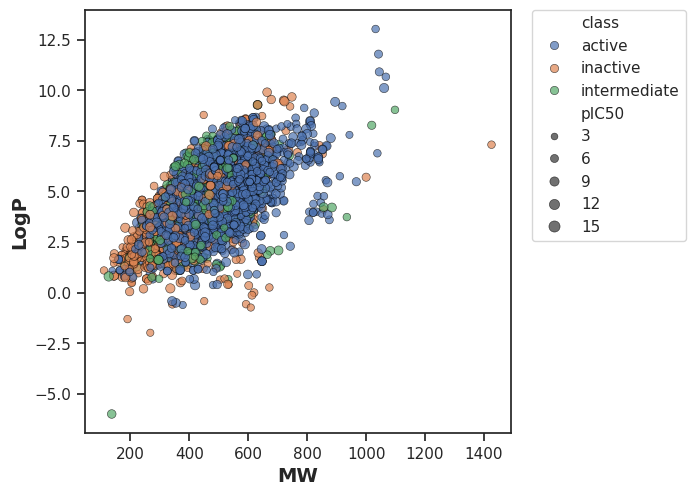

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')

In [30]:
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,inactive,283.287,2.31056,2.0,4.0,6.769551
6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,539.999,3.22822,3.0,7.0,5.031517
7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,249.222,1.40098,2.0,5.0,3.301030
8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,active,236.234,1.55914,2.0,5.0,2.522879
...,...,...,...,...,...,...,...,...
9789,NaN,NaN,active,591.514,5.10290,3.0,9.0,NaN
9790,NaN,NaN,active,550.505,5.33730,3.0,7.0,NaN
9791,NaN,NaN,active,548.489,5.09130,3.0,7.0,NaN
9792,NaN,NaN,active,578.515,5.09990,3.0,8.0,NaN


In [31]:
#remove NaN
df_cleaned = df_final.dropna()

df_cleaned

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,inactive,283.287,2.31056,2.0,4.0,6.769551
6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,539.999,3.22822,3.0,7.0,5.031517
7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,249.222,1.40098,2.0,5.0,3.301030
8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,active,236.234,1.55914,2.0,5.0,2.522879
...,...,...,...,...,...,...,...,...
9761,CHEMBL3786523,C=CC(=O)N1C[C@H](COC)[C@@H](COc2nc(Nc3cnn(C)c3...,active,566.637,5.49760,1.0,9.0,5.040959
9762,CHEMBL3787132,C=CC(=O)N1C[C@@H](COc2nc(Nc3cnn(C)c3)nc3[nH]cc...,active,570.694,5.60620,1.0,10.0,5.000000
9763,CHEMBL3787386,C#CCOc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)C=C,active,514.630,4.88020,2.0,9.0,7.823909
9764,CHEMBL3786812,C#CCCn1cc(Nc2nc(OC[C@H]3CN(C(=O)C=C)C[C@@H]3OC...,active,514.630,4.70450,1.0,9.0,5.376751


In [32]:
#subset the pIC50
pIC = df_final[("pIC50")]

In [33]:
# There might be one or more valid SMILES that can represent one compound
# Thanks to Pat Walters for this information,checkout his excellent blog: https://www.blogger.com/profile/18223198920629617711
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

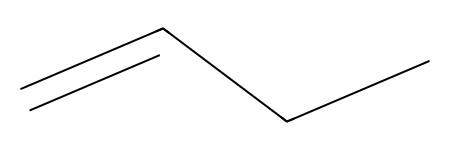

In [34]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

Chem.MolFromSmiles('C=CCC')

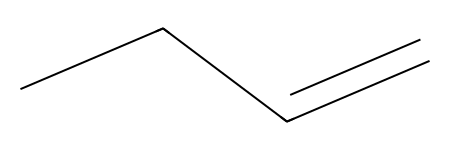

In [35]:
Chem.MolFromSmiles('CCC=C')

## Calculate descriptors using RDkit

### a. General molecular descriptors-about 200 molecular descriptors

In [36]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

In [37]:
# Function call
Mol_descriptors,desc_names = RDkit_descriptors(df_cleaned["canonical_smiles"])

In [38]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136,0,...,0,0,0,0,0,0,0,0,0,0
1,14.386785,-3.932638,14.386785,0.006055,0.489619,482.903,462.743,482.126944,174,0,...,0,0,0,0,0,0,0,0,0,0
2,8.794861,-3.421084,8.794861,0.102909,0.391062,369.432,350.280,369.170194,138,0,...,0,0,0,0,0,0,0,0,0,0
3,12.518102,-3.895481,12.518102,0.561701,0.804599,283.287,270.183,283.095691,106,0,...,0,0,0,0,0,0,0,0,0,0
4,10.996141,-1.465112,10.996141,0.614630,0.650834,164.160,156.096,164.047344,62,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5932,13.298515,-4.687657,13.298515,0.046002,0.511928,445.911,421.719,445.162915,164,0,...,0,0,0,0,0,0,0,0,0,0
5933,13.130133,-4.465782,13.130133,0.009358,0.551104,431.884,409.708,431.147265,158,0,...,0,0,0,0,0,0,0,0,0,0
5934,14.186999,-3.080669,14.186999,0.111454,0.479555,396.809,382.697,396.078932,140,0,...,0,0,0,1,0,0,0,0,0,0
5935,13.193622,-4.514560,13.193622,0.023062,0.365833,469.933,445.741,469.162915,172,0,...,0,0,0,1,0,0,0,0,0,0


In [131]:
fp_pIC = pd.concat([df_with_200_descriptors, df_lipinski, pIC], axis=1)

In [132]:
fp_pIC.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,383.814,4.45034,3.0,4.0,7.387216
1,14.386785,-3.932638,14.386785,0.006055,0.489619,482.903,462.743,482.126944,174.0,0.0,...,0.0,0.0,0.0,0.0,0.0,482.903,3.61432,3.0,6.0,NaN
2,8.794861,-3.421084,8.794861,0.102909,0.391062,369.432,350.280,369.170194,138.0,0.0,...,0.0,0.0,0.0,0.0,0.0,369.432,4.77200,1.0,6.0,NaN
3,12.518102,-3.895481,12.518102,0.561701,0.804599,283.287,270.183,283.095691,106.0,0.0,...,0.0,0.0,0.0,0.0,0.0,283.287,2.31056,2.0,4.0,6.769551
4,10.996141,-1.465112,10.996141,0.614630,0.650834,164.160,156.096,164.047344,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,164.160,1.49000,2.0,2.0,NaN


In [133]:
# the Molecular is now in duplicate, one from Lipinski df (MW) and the other from the molecular descriptor (MolWt), you can drop one
fp_pIC = fp_pIC.drop('MW', axis=1)

In [134]:
fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,pIC50
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.45034,3.0,4.0,7.387216
1,14.386785,-3.932638,14.386785,0.006055,0.489619,482.903,462.743,482.126944,174.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.61432,3.0,6.0,NaN
2,8.794861,-3.421084,8.794861,0.102909,0.391062,369.432,350.280,369.170194,138.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.77200,1.0,6.0,NaN
3,12.518102,-3.895481,12.518102,0.561701,0.804599,283.287,270.183,283.095691,106.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.31056,2.0,4.0,6.769551
4,10.996141,-1.465112,10.996141,0.614630,0.650834,164.160,156.096,164.047344,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.49000,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.387216
17239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.221849
17240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.557520
17241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.494850


In [135]:
# the Molecular is now in duplicate, one from Lipinski df (MW) and the other from the molecular descriptor (MolWt), you can drop one
fp_pIC = fp_pIC.dropna()

In [136]:
fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,pIC50
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.45034,3.0,4.0,7.387216
3,12.518102,-3.895481,12.518102,0.561701,0.804599,283.287,270.183,283.095691,106.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.31056,2.0,4.0,6.769551
6,14.546183,-4.566437,14.546183,0.115355,0.394789,539.999,512.783,539.184794,198.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.22822,3.0,7.0,5.031517
7,11.501241,-3.244823,11.501241,0.966435,0.617628,249.222,238.134,249.063722,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.40098,2.0,5.0,3.301030
8,9.293065,-0.927286,9.293065,0.229561,0.596276,236.234,228.170,236.069811,86.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.55914,2.0,5.0,2.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5769,13.962929,-5.539166,13.962929,0.003752,0.736295,361.327,347.215,361.115045,134.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.14490,2.0,4.0,5.997834
5801,14.391388,-4.682164,14.391388,0.040048,0.426679,431.834,415.706,431.107292,154.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.84290,3.0,6.0,5.484537
5814,9.121046,-3.741157,9.121046,0.217786,0.469047,407.495,386.327,407.130363,148.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,4.52100,2.0,7.0,6.211832
5835,8.876770,-3.316983,8.876770,0.033716,0.518830,377.469,358.317,377.119798,136.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,4.47130,2.0,6.0,5.217742


In [137]:
fp_pIC.replace([np.inf, -np.inf], np.nan, inplace=True)

<ipython-input-137-b2100c39e1e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_pIC.replace([np.inf, -np.inf], np.nan, inplace=True)


In [138]:
fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,pIC50
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.45034,3.0,4.0,7.387216
3,12.518102,-3.895481,12.518102,0.561701,0.804599,283.287,270.183,283.095691,106.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.31056,2.0,4.0,6.769551
6,14.546183,-4.566437,14.546183,0.115355,0.394789,539.999,512.783,539.184794,198.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.22822,3.0,7.0,5.031517
7,11.501241,-3.244823,11.501241,0.966435,0.617628,249.222,238.134,249.063722,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.40098,2.0,5.0,3.301030
8,9.293065,-0.927286,9.293065,0.229561,0.596276,236.234,228.170,236.069811,86.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.55914,2.0,5.0,2.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5769,13.962929,-5.539166,13.962929,0.003752,0.736295,361.327,347.215,361.115045,134.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.14490,2.0,4.0,5.997834
5801,14.391388,-4.682164,14.391388,0.040048,0.426679,431.834,415.706,431.107292,154.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.84290,3.0,6.0,5.484537
5814,9.121046,-3.741157,9.121046,0.217786,0.469047,407.495,386.327,407.130363,148.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,4.52100,2.0,7.0,6.211832
5835,8.876770,-3.316983,8.876770,0.033716,0.518830,377.469,358.317,377.119798,136.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,4.47130,2.0,6.0,5.217742


In [139]:
fp_pIC = fp_pIC.dropna()

In [140]:
fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,pIC50
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.45034,3.0,4.0,7.387216
3,12.518102,-3.895481,12.518102,0.561701,0.804599,283.287,270.183,283.095691,106.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.31056,2.0,4.0,6.769551
6,14.546183,-4.566437,14.546183,0.115355,0.394789,539.999,512.783,539.184794,198.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.22822,3.0,7.0,5.031517
7,11.501241,-3.244823,11.501241,0.966435,0.617628,249.222,238.134,249.063722,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.40098,2.0,5.0,3.301030
8,9.293065,-0.927286,9.293065,0.229561,0.596276,236.234,228.170,236.069811,86.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.55914,2.0,5.0,2.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5769,13.962929,-5.539166,13.962929,0.003752,0.736295,361.327,347.215,361.115045,134.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.14490,2.0,4.0,5.997834
5801,14.391388,-4.682164,14.391388,0.040048,0.426679,431.834,415.706,431.107292,154.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.84290,3.0,6.0,5.484537
5814,9.121046,-3.741157,9.121046,0.217786,0.469047,407.495,386.327,407.130363,148.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,4.52100,2.0,7.0,6.211832
5835,8.876770,-3.316983,8.876770,0.033716,0.518830,377.469,358.317,377.119798,136.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,4.47130,2.0,6.0,5.217742


# **Train your model**

In [151]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler

# Ensure both X and y have the same number of samples
fp_pIC = fp_pIC.reset_index(drop=True)

X = fp_pIC.drop("pIC50", axis=1)  # Use df_with_200_descriptors as features
y = fp_pIC.pIC50

# Use RobustScaler to handle outliers and scale features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for NaN values in y_train and handle them
if pd.isnull(y_train).any():
    print("Warning: NaN values found in y_train. Dropping rows with NaN.")
    X_train = X_train[~pd.isnull(y_train)]
    y_train = y_train[~pd.isnull(y_train)]
    x_test = X_test[~pd.isnull(y_test)]
    y_test = y_test[~pd.isnull(y_test)]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [148]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.254858016129063
R-squared: 0.8975385921910887


## **Mounting the Google Drive into Google Colab**

In [154]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [159]:
import chardet

In [163]:
#read your file from gdrive
ligand_file = "/content/gdrive/MyDrive/tunde_ligand.csv"

In [198]:
with open(ligand_file, 'rb') as f:
    result = chardet.detect(f.read())
imported_ligand = pd.read_csv(ligand_file, encoding=result['encoding']) # read the file using the detected encoding

In [199]:
imported_ligand.head()

,SN,Ligands,Pubchem CID,SMILES
0,1,Thujole,261491,C[C@@H]1[C@H]2C[C@]2(CC1=O)C(C)C
1,2,Camphor,2537,CC1(C2CCC1(C(=O)C2)C)C
2,3,"· 1,8-Cineole",2758,CC1(C2CCC(O1)(CC2)C)C
3,4,?-Pinene,6654,CC1=CCC2CC1C2(C)C
4,5,?-Pinene,14896,CC1(C2CCC(=C)C1C2)C


In [188]:
## calculate libinski descripters for the ligands
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
def lipinski(SMILES, verbose=False):
    moldata= []
    for elem in SMILES:
        # Check if elem is a valid SMILES string before converting
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            moldata.append(mol)
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors

In [200]:
df_ligands_lipinski = lipinski(imported_ligand['SMILES'])
df_ligands_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,152.237,2.2576,0.0,1.0
1,152.237,2.4017,0.0,1.0
2,154.253,2.7441,0.0,1.0
3,136.238,2.9987,0.0,0.0
4,136.238,2.9987,0.0,0.0


In [190]:
## getting ligands molecular descriptors
def RDKit_descriptors(SMILES ):
    mols = [Chem.MolFromSmiles(i) for i in SMILES ]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:#add hydrogen to molecules
        mol = Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

In [201]:
MoleculeDescriptors_list, desc_names = RDKit_descriptors(imported_ligand['SMILES'])

In [204]:
df_ligands_descriptors = pd.DataFrame(MoleculeDescriptors_list,columns=desc_names) # Changed MoleculeDescriptors to MoleculeDescriptors_list
df_ligands_descriptors.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.575245,-4.077917,12.575245,2.134028,0.562950,152.237,136.109,152.120115,62,0,...,0,0,0,0,0,0,0,0,0,0
1,12.913056,-4.181713,12.913056,2.252431,0.520631,152.237,136.109,152.120115,62,0,...,0,0,0,0,0,0,0,0,0,0
2,8.472917,-4.260417,8.472917,4.039583,0.521026,154.253,136.109,154.135765,64,0,...,0,0,0,0,0,0,0,0,0,0
3,8.437037,-3.793750,8.437037,1.442824,0.448983,136.238,120.110,136.125201,56,0,...,0,0,0,0,0,0,0,0,0,0
4,8.437037,-3.793750,8.437037,1.526505,0.448983,136.238,120.110,136.125201,56,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
# compine the lipinski and the discreptors
fp_ligands = pd.concat([df_ligands_descriptors, df_ligands_lipinski,], axis=1)

In [206]:
fp_ligands.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,MW,LogP,NumHDonors,NumHAcceptors
0,12.575245,-4.077917,12.575245,2.134028,0.562950,152.237,136.109,152.120115,62,0,...,0,0,0,0,0,0,152.237,2.2576,0.0,1.0
1,12.913056,-4.181713,12.913056,2.252431,0.520631,152.237,136.109,152.120115,62,0,...,0,0,0,0,0,0,152.237,2.4017,0.0,1.0
2,8.472917,-4.260417,8.472917,4.039583,0.521026,154.253,136.109,154.135765,64,0,...,0,0,0,0,0,0,154.253,2.7441,0.0,1.0
3,8.437037,-3.793750,8.437037,1.442824,0.448983,136.238,120.110,136.125201,56,0,...,0,0,0,0,0,0,136.238,2.9987,0.0,0.0
4,8.437037,-3.793750,8.437037,1.526505,0.448983,136.238,120.110,136.125201,56,0,...,0,0,0,0,0,0,136.238,2.9987,0.0,0.0


In [207]:
# the Molecular is now in duplicate, one from Lipinski df (MW) and the other from the molecular descriptor (MolWt), drop one
fp_ligands = fp_ligands.drop('MW', axis=1)
fp_ligands.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors
0,12.575245,-4.077917,12.575245,2.134028,0.562950,152.237,136.109,152.120115,62,0,...,0,0,0,0,0,0,0,2.2576,0.0,1.0
1,12.913056,-4.181713,12.913056,2.252431,0.520631,152.237,136.109,152.120115,62,0,...,0,0,0,0,0,0,0,2.4017,0.0,1.0
2,8.472917,-4.260417,8.472917,4.039583,0.521026,154.253,136.109,154.135765,64,0,...,0,0,0,0,0,0,0,2.7441,0.0,1.0
3,8.437037,-3.793750,8.437037,1.442824,0.448983,136.238,120.110,136.125201,56,0,...,0,0,0,0,0,0,0,2.9987,0.0,0.0
4,8.437037,-3.793750,8.437037,1.526505,0.448983,136.238,120.110,136.125201,56,0,...,0,0,0,0,0,0,0,2.9987,0.0,0.0


In [208]:
fp_ligands =fp_ligands.dropna()

In [209]:
imported_ligand['predicted_pIC50'] = model.predict(fp_ligands) # Predict using the dataframe without the 'pIC50' column

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [211]:
imported_ligand.head()

,SN,Ligands,Pubchem CID,SMILES,predicted_pIC50
0,1,Thujole,261491,C[C@@H]1[C@H]2C[C@]2(CC1=O)C(C)C,7.240227
1,2,Camphor,2537,CC1(C2CCC1(C(=O)C2)C)C,7.266087
2,3,"· 1,8-Cineole",2758,CC1(C2CCC(O1)(CC2)C)C,6.848843
3,4,?-Pinene,6654,CC1=CCC2CC1C2(C)C,6.657591
4,5,?-Pinene,14896,CC1(C2CCC(=C)C1C2)C,6.651447


#**Transform and make new prediction**

In [212]:
scaler = RobustScaler()
fp_ligands_transformed = scaler.fit_transform(fp_ligands)

In [213]:
imported_ligand['T_predicted_pIC50'] = model.predict(fp_ligands_transformed)

In [214]:
imported_ligand

,SN,Ligands,Pubchem CID,SMILES,predicted_pIC50,T_predicted_pIC50
0,1,Thujole,261491,C[C@@H]1[C@H]2C[C@]2(CC1=O)C(C)C,7.240227,5.639031
1,2,Camphor,2537,CC1(C2CCC1(C(=O)C2)C)C,7.266087,5.871932
2,3,"· 1,8-Cineole",2758,CC1(C2CCC(O1)(CC2)C)C,6.848843,6.111157
3,4,?-Pinene,6654,CC1=CCC2CC1C2(C)C,6.657591,6.858064
4,5,?-Pinene,14896,CC1(C2CCC(=C)C1C2)C,6.651447,6.802358
5,6,Limonene,440917,CC1=CC[C@@H](CC1)C(=C)C,6.622136,6.895191
6,7,Linalool,67179,CC(=CCC[C@@](C)(C=C)O)C,6.748221,6.718503
7,8,Bornyl acetate,6448,CC(=O)OC1CC2CCC1(C2(C)C)C,7.211508,6.064744
8,9,Terpinen-4-ol,2724161,CC1=CC[C@@](CC1)(C(C)C)O,6.750528,6.797895
9,10,?-Terpinene,7462,CC1=CC=C(CC1)C(C)C,6.626104,6.928002


#                            **THE END**                  